<a href="https://colab.research.google.com/github/MartaCampagnoli/PageRank-MovieActors/blob/main/Complete%20Notebook/Page_Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(figsize=(100, 100), dpi=80)
from networkx import pagerank

<Figure size 8000x8000 with 0 Axes>

In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Functions

In [ ]:
def edgelistdirected(l1, l2):
    edgelist=[]
    for i in l1:
        for j in l2:
            if i[0] != j[0]:
                if i[1] == j [1] and i != j:
                        edgelist.append((i[0], j[0]))
    return edgelist

def listcreation(d):
    l1 =[]
    l2=[]
    l1 = d['movieactorlist'].values.tolist()
    l2 = d['movieactorlist'].values.tolist()
    return l1, l2

def listcreation2(d):
    l1 =[]
    l2=[]
    l1 = d['movieactorlist2'].values.tolist()
    l2 = d['movieactorlist2'].values.tolist()
    return l1, l2

## Creating the Movie-Actors Network : merging data

In [ ]:
from google.colab import files #kaggle.json import
files.upload() 

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download --d ashirwadsangwan/imdb-dataset
! unzip imdb-dataset.zip

In [ ]:
file1 = ('title.principals.tsv/data.tsv')
data = pd.read_csv(file1, sep='\t')

In [ ]:
data.loc[data['category'].str.contains('actor', case=False), 'isactor'] = 'actor' #extract from category column actors and create a new column
data.loc[data['category'].str.contains('actress', case=False), 'isactor'] = 'actor'

In [ ]:
data = data.dropna(subset=['isactor']) ##drop non actors
data.shape

(20815083, 7)

In [ ]:
data.head()

,tconst,ordering,nconst,category,job,characters,isactor
11,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]",actor
12,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]",actor
16,tt0000007,1,nm0179163,actor,\N,\N,actor
17,tt0000007,2,nm0183947,actor,\N,\N,actor
21,tt0000008,1,nm0653028,actor,\N,"[""Sneezing Man""]",actor


In [ ]:
file2 = ('title.basics.tsv/data.tsv')
data2 = pd.read_csv(file2, sep='\t')

In [ ]:
data2.head()

C:\Users\carla\AppData\Local\Temp\ipykernel_4692\1169437740.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data2=pd.read_csv("C:/Users/carla/Downloads/archivio/title.basics.tsv/data.tsv", sep='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [ ]:
data2b = data2[(data2.titleType == "movie")| (data2.titleType == "tvMovie")] #we filter other media type so to only have movies
data2b.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama


In [ ]:
file4 = ('name.basics.tsv/data.tsv')
data4 = pd.read_csv(file4, sep='\t')

In [ ]:
data4a = data4.dropna()

In [ ]:
data4a.loc[data4a['primaryProfession'].str.contains('actor', case=False, na=False), 'isactor'] = 'actor''
data4a.loc[data4a['primaryProfession'].str.contains('actress', case=False,na=False), 'isactor'] = 'actor'
data4a = data4a.dropna(subset=['isactor'])
data4a.head() #extract people who have worked as actors at least once

C:\Users\carla\AppData\Local\Temp\ipykernel_4692\4286391651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4a.loc[data4a['primaryProfession'].str.contains('actor', case=False, na=False), 'isactor'] = 'actor'


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,isactor
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",actor
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0038355,tt0037382,tt0071877",actor
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0057345,tt0049189,tt0054452",actor
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0072562,tt0077975",actor
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0060827,tt0050986",actor


In [ ]:
data4a.shape

(9479708, 7)

In [ ]:
datanew = pd.merge(left=data4a, right=data, on='nconst') #match actors with their code in order to have a row for each movie any actor worked in 
#quicker than cleaning and duplicating the knownForTitles column

In [ ]:
datanew.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,isactor_x,tconst,ordering,category,job,characters,isactor_y
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",actor,tt0025164,1,actor,\N,"[""Guy Holden""]",actor
1,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",actor,tt0026942,2,actor,\N,"[""Huck Haines""]",actor
2,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",actor,tt0027125,1,actor,\N,"[""Jerry Travers""]",actor
3,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",actor,tt0027630,1,actor,\N,"[""Bake Baker""]",actor
4,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",actor,tt0028333,1,actor,\N,"[""Lucky Garnett""]",actor


In [ ]:
datanew2 = pd.merge(left=data2b, right=datanew, on='tconst') #match each movie with every actor that worked in the movie

In [ ]:
datanew2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,nconst,...,birthYear,deathYear,primaryProfession,knownForTitles,isactor_x,ordering,category,job,characters,isactor_y
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,nm0063086,...,1878,1951,actress,tt0000009,actor,1,actress,\N,"[""Miss Geraldine Holbrook (Miss Jerry)""]",actor
1,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,nm0183823,...,1875,1933,actor,"tt0021535,tt0020355,tt0000009,tt0020403",actor,2,actor,\N,"[""Mr. Hamilton""]",actor
2,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,nm1309758,...,1834,1928,"actor,writer","tt0000009,tt1076833,tt0490842,tt4484306",actor,3,actor,\N,"[""Chauncey Depew - the Director of the New Yor...",actor
3,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,nm0215752,...,\N,\N,actor,tt0000502,actor,1,actor,\N,\N,actor
4,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,nm0252720,...,\N,\N,actor,tt0000502,actor,2,actor,\N,\N,actor


In [ ]:
datanew3 = datanew2.drop(['titleType', 'originalTitle', 'isAdult', 'endYear', 'job', 'isactor_x', 'isactor_y', 'knownForTitles'], axis = 1)

In [ ]:
datanew4 = datanew3.sort_values("primaryName")

In [ ]:
datanew4.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,ordering,category,characters
1035398,tt10039392,The Ghindaring,\N,80,"Adventure,Drama,Family",nm10555718,'Aunty' Mary Hooker,\N,\N,actress,1,actress,"[""Nan""]"
10655,tt0007353,A Sister of Six,1916,50,"Adventure,Drama,Western",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,9,actress,"[""Priscilla""]"
17338,tt0009055,Fan Fan,1918,50,"Comedy,Drama",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,3,actress,"[""Lady Shoo""]"
7162,tt0006338,Acquitted,1916,50,Drama,nm0211329,'Baby' Carmen De Rue,1908,1986,actress,4,actress,"[""Nellie Carter""]"
11843,tt0007669,The Babes in the Woods,1917,50,"Drama,Family,Fantasy",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,4,actress,"[""The Good Fairy""]"


In [ ]:
datanew4['freq'] = datanew4.groupby('primaryName')['primaryName'].transform('count') #count how many movies every actor has been in
datanew4.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,ordering,category,characters,freq
1035398,tt10039392,The Ghindaring,\N,80,"Adventure,Drama,Family",nm10555718,'Aunty' Mary Hooker,\N,\N,actress,1,actress,"[""Nan""]",1
10655,tt0007353,A Sister of Six,1916,50,"Adventure,Drama,Western",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,9,actress,"[""Priscilla""]",5
17338,tt0009055,Fan Fan,1918,50,"Comedy,Drama",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,3,actress,"[""Lady Shoo""]",5
7162,tt0006338,Acquitted,1916,50,Drama,nm0211329,'Baby' Carmen De Rue,1908,1986,actress,4,actress,"[""Nellie Carter""]",5
11843,tt0007669,The Babes in the Woods,1917,50,"Drama,Family,Fantasy",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,4,actress,"[""The Good Fairy""]",5


In [ ]:
datanew4 = datanew4[(datanew4.freq != 1 )] #drop all actors that have been in only one movie: they will not connect any two movies


,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,ordering,category,characters,freq
10655,tt0007353,A Sister of Six,1916,50,"Adventure,Drama,Western",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,9,actress,"[""Priscilla""]",5
17338,tt0009055,Fan Fan,1918,50,"Comedy,Drama",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,3,actress,"[""Lady Shoo""]",5
7162,tt0006338,Acquitted,1916,50,Drama,nm0211329,'Baby' Carmen De Rue,1908,1986,actress,4,actress,"[""Nellie Carter""]",5
11843,tt0007669,The Babes in the Woods,1917,50,"Drama,Family,Fantasy",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,4,actress,"[""The Good Fairy""]",5
13616,tt0008144,Jack and the Beanstalk,1917,100,Fantasy,nm0211329,'Baby' Carmen De Rue,1908,1986,actress,4,actress,"[""The King of Cornwall""]",5


In [ ]:
datanew5= datanew4.sort_values("primaryTitle")

The network now contains all necessary data to create nodes and edges to create a network. Using the Networkx package, the "Primary Title" column can be used to create nodes (double nodes arenot allowed, so the fact that each title appears more than once does not constitue a problem). A function has been created to get edges, which, once the nodes have been properly mapped to indeces, are the data we need for the PageRank algorithm.

In order to avoid repeating the first part of the process for later use, we save this version of the file for further processing.

In [ ]:
## compression_opts = dict(method='zip',archive_name='out2.csv')  
## datanew5.to_csv('out2.zip', index=False, compression=compression_opts) #save file for future use 

## Creating the Movie-Actors Network : nodes, edges, preliminary visualization

Because of hardware limitations, the following part of the project contains the same process twice; the first is a simplified process to create a small network of only two actors on which I tested the various steps of the work to check for its functioning; the second part creates a larger (although restricted with respect to the entire dataset) network on which i ran the algorithm.

In [ ]:
## datanew5 = pd.read_csv("./networkprep.csv") #import file from the Dataset Preparation (Kaggle and Google Drive) folder 

In [ ]:
datanew5.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,ordering,category,characters,freq
0,tt6915008,#1,\N,\N,Documentary,nm0285330,Forbes Riley,1960,\N,"actress,producer",2,actress,\N,6
1,tt6915008,#1,\N,\N,Documentary,nm0634760,Peter Noone,1947,\N,"actor,soundtrack",1,actor,\N,6
2,tt6915008,#1,\N,\N,Documentary,nm1643411,Tommy James,1947,\N,"soundtrack,composer",5,actor,\N,2
3,tt6915008,#1,\N,\N,Documentary,nm1866067,Scotty Bowman,1933,\N,actor,6,actor,\N,2
4,tt2346170,#1 Serial Killer,2013,87,Horror,nm0002245,Tzi Ma,\N,\N,"actor,producer",3,actor,"[""Mr. Chang""]",15


In [ ]:
datanew5a = datanew5[['tconst', 'primaryTitle', 'nconst', 'primaryName']] 
datanew5a.head()

#for ease of visualisation we reduce the dataset to movie, actors, and corresponding codes

,tconst,primaryTitle,nconst,primaryName
0,tt6915008,#1,nm0285330,Forbes Riley
1,tt6915008,#1,nm0634760,Peter Noone
2,tt6915008,#1,nm1643411,Tommy James
3,tt6915008,#1,nm1866067,Scotty Bowman
4,tt2346170,#1 Serial Killer,nm0002245,Tzi Ma


In [ ]:
##reduntant, but added here to merge notebooks

datanew5b = datanew5[['tconst', 'primaryTitle', 'nconst', 'primaryName']] 

In [ ]:
##compression_opts = dict(method='zip',archive_name='out7.csv')  
## datanew5a.to_csv('out7.zip', index=False,compression=compression_opts)

A limitation of the process I used is that the data needs to be reprocessed from here each time we need or want to use a different subset as a network; saving the list of tuples created in the following steps for later use will make it difficult to access them to create edges. I show how the tuples are created, then repeat the testing process for creating a network on the two aforementioned examples.

In [ ]:
datanew5a['movieactorlist'] = list(zip(datanew5a.primaryTitle, datanew5a.primaryName))

#we create a new column with a list of tuples each containing a movie and an actor

C:\Users\carla\AppData\Local\Temp\ipykernel_4896\2153704073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew5a['movieactorlist'] = list(zip(datanew5a.primaryTitle, datanew5a.primaryName))


In [ ]:
datanew5a.head()

,tconst,primaryTitle,nconst,primaryName,movieactorlist
0,tt6915008,#1,nm0285330,Forbes Riley,"(#1, Forbes Riley)"
1,tt6915008,#1,nm0634760,Peter Noone,"(#1, Peter Noone)"
2,tt6915008,#1,nm1643411,Tommy James,"(#1, Tommy James)"
3,tt6915008,#1,nm1866067,Scotty Bowman,"(#1, Scotty Bowman)"
4,tt2346170,#1 Serial Killer,nm0002245,Tzi Ma,"(#1 Serial Killer, Tzi Ma)"


For the first netwok for testing, I created a very small network of two actors who share a single working credit in the same movie.

In [ ]:
##filter for two actors and and test if it works

In [ ]:
datanew5b.head()

,tconst,primaryTitle,nconst,primaryName
0,tt6915008,#1,nm0285330,Forbes Riley
1,tt6915008,#1,nm0634760,Peter Noone
2,tt6915008,#1,nm1643411,Tommy James
3,tt6915008,#1,nm1866067,Scotty Bowman
4,tt2346170,#1 Serial Killer,nm0002245,Tzi Ma


In [ ]:
datanew6a = datanew5b[datanew5b.primaryName.isin(["Jemaine Clement", "Taika Waititi"])]

In [ ]:
datanew6a.head()

,tconst,primaryTitle,nconst,primaryName
98043,tt10303630,An American in Whakataki,nm1318596,Jemaine Clement
98588,tt6518270,An Evening with Beverly Luff Linn,nm1318596,Jemaine Clement
139953,tt5637536,Avatar 5,nm1318596,Jemaine Clement
217917,tt1560139,Boy,nm0169806,Taika Waititi
416238,tt3534282,Don Verdean,nm1318596,Jemaine Clement


In [ ]:
datanew6a['movieactorlist'] = list(zip(datanew6a.primaryTitle, datanew6a.primaryName))
datanew6a.head()

C:\Users\carla\AppData\Local\Temp\ipykernel_4896\2195516999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew6a['movieactorlist'] = list(zip(datanew6a.primaryTitle, datanew6a.primaryName))


,tconst,primaryTitle,nconst,primaryName,movieactorlist
98043,tt10303630,An American in Whakataki,nm1318596,Jemaine Clement,"(An American in Whakataki, Jemaine Clement)"
98588,tt6518270,An Evening with Beverly Luff Linn,nm1318596,Jemaine Clement,"(An Evening with Beverly Luff Linn, Jemaine Cl..."
139953,tt5637536,Avatar 5,nm1318596,Jemaine Clement,"(Avatar 5, Jemaine Clement)"
217917,tt1560139,Boy,nm0169806,Taika Waititi,"(Boy, Taika Waititi)"
416238,tt3534282,Don Verdean,nm1318596,Jemaine Clement,"(Don Verdean, Jemaine Clement)"


In [ ]:
l1, l2 = listcreation(datanew6a)
l1,l2

In [ ]:
edgel1l2directed = edgelistdirected(l1, l2)

In [ ]:
edgel1l2directed

While each relation is of course bidirectional, I create directed edges because the PageRank algorithm works on directed graphs.

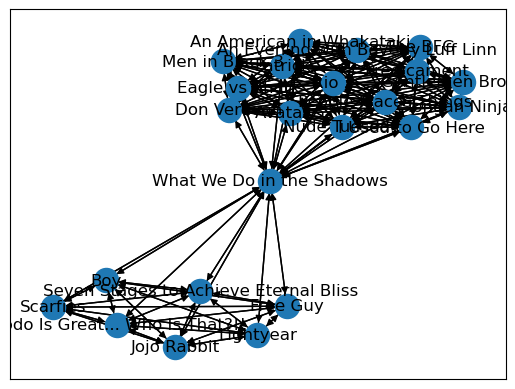

In [ ]:
G1d = nx.DiGraph() #creation of a directed graph
G1d.add_nodes_from(datanew6a["primaryTitle"]) #nodes
G1d.add_edges_from(edgel1l2directed) #edges
nx.draw_networkx(G1d)

In [ ]:
pagerank(G1d) #testing with the prebuild pagerank algorithm with Networkx

{'An American in Whakataki': 0.045513937404677615,
 'An Evening with Beverly Luff Linn': 0.045513937404677615,
 'Avatar 5': 0.045513937404677615,
 'Boy': 0.03466009967403101,
 'Don Verdean': 0.045513937404677615,
 'Eagle vs Shark': 0.045513937404677615,
 'Free Guy': 0.03466009967403101,
 'Frodo Is Great... Who Is That?!!': 0.03466009967403101,
 'Gentlemen Broncos': 0.045513937404677615,
 'I Used to Go Here': 0.045513937404677615,
 'Jojo Rabbit': 0.03466009967403101,
 'Lightyear': 0.03466009967403101,
 'Men in Black 3': 0.045513937404677615,
 'Nude Tuesday': 0.045513937404677615,
 'Patrick': 0.045513937404677615,
 'People Places Things': 0.045513937404677615,
 'Predicament': 0.045513937404677615,
 'Rio 2': 0.045513937404677615,
 'Scarfies': 0.03466009967403101,
 'Seven Stages to Achieve Eternal Bliss': 0.03466009967403101,
 'The BFG': 0.045513937404677615,
 'Tongan Ninja': 0.045513937404677615,
 'What We Do in the Shadows': 0.07467024121161804}

In [ ]:
nx. write_gexf(G1d, "test5.gexf")

In [ ]:
##not everyone is correctly credited so the graphic won't be perfect, ex: Taika Waititi isn't credited for Thor: Love and Thunder as an actor 

In order to create a bigger network to test, I now further filter the dataset, restricting the time window to the last 5 years, to 2020 and 2021, and to 2020 only and avoiding title repetition by filtering out movie titles used outside of the US.

In [ ]:
datatoprep2 = datanew5  #originally I reuploaded a saved file here
datatoprep2.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,ordering,category,characters,freq
0,tt6915008,#1,\N,\N,Documentary,nm0285330,Forbes Riley,1960,\N,"actress,producer",2,actress,\N,6
1,tt6915008,#1,\N,\N,Documentary,nm0634760,Peter Noone,1947,\N,"actor,soundtrack",1,actor,\N,6
2,tt6915008,#1,\N,\N,Documentary,nm1643411,Tommy James,1947,\N,"soundtrack,composer",5,actor,\N,2
3,tt6915008,#1,\N,\N,Documentary,nm1866067,Scotty Bowman,1933,\N,actor,6,actor,\N,2
4,tt2346170,#1 Serial Killer,2013,87,Horror,nm0002245,Tzi Ma,\N,\N,"actor,producer",3,actor,"[""Mr. Chang""]",15


In [ ]:
datatoprep3= datatoprep2.dropna(subset=['startYear'])
datatoprep3a= datatoprep3[(datatoprep3["startYear"] != "\\N")]
datatoprep3b= datatoprep3a[(datatoprep3a["startYear"] >= "1992")]

In [ ]:
datatoprep3b.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,ordering,category,characters,freq
4,tt2346170,#1 Serial Killer,2013,87,Horror,nm0002245,Tzi Ma,\N,\N,"actor,producer",3,actor,"[""Mr. Chang""]",15
5,tt2346170,#1 Serial Killer,2013,87,Horror,nm2104193,Shoshana Bush,1988,\N,"actress,director,writer",4,actress,"[""Tricia Arnold""]",7
6,tt2346170,#1 Serial Killer,2013,87,Horror,nm0864937,Jason Tobin,\N,\N,"actor,director,writer",1,actor,"[""Eddy Tsai""]",7
7,tt2346170,#1 Serial Killer,2013,87,Horror,nm1067699,Eugenia Yuan,1976,\N,"actress,miscellaneous,sound_department",2,actress,"[""Karena Lee""]",12
8,tt21982418,#4 Mangifera,2022,52,"Biography,Documentary,Drama",nm1411240,Flávia Gusmão,1978,\N,"miscellaneous,actress,producer",1,actress,"[""(Self)""]",6


In [ ]:
datatoprep3b.shape

(809321, 14)

In [ ]:
datatoprep3b.loc[datatoprep3b['genres'].str.contains('documentary', case=False), 'isdocu'] = 'docu' 

C:\Users\carla\AppData\Local\Temp\ipykernel_12520\1821293280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatoprep3b.loc[datatoprep3b['genres'].str.contains('documentary', case=False), 'isdocu'] = 'docu'


In [ ]:
datatoprep3b.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,ordering,category,characters,freq,isdocu
4,tt2346170,#1 Serial Killer,2013,87,Horror,nm0002245,Tzi Ma,\N,\N,"actor,producer",3,actor,"[""Mr. Chang""]",15,NaN
5,tt2346170,#1 Serial Killer,2013,87,Horror,nm2104193,Shoshana Bush,1988,\N,"actress,director,writer",4,actress,"[""Tricia Arnold""]",7,NaN
6,tt2346170,#1 Serial Killer,2013,87,Horror,nm0864937,Jason Tobin,\N,\N,"actor,director,writer",1,actor,"[""Eddy Tsai""]",7,NaN
7,tt2346170,#1 Serial Killer,2013,87,Horror,nm1067699,Eugenia Yuan,1976,\N,"actress,miscellaneous,sound_department",2,actress,"[""Karena Lee""]",12,NaN
8,tt21982418,#4 Mangifera,2022,52,"Biography,Documentary,Drama",nm1411240,Flávia Gusmão,1978,\N,"miscellaneous,actress,producer",1,actress,"[""(Self)""]",6,docu


In [ ]:
datatoprep3c= datatoprep3b[(datatoprep3b["isdocu"] != "docu")] #filter out most documentaries

In [ ]:
datatoprep3c.shape

(781581, 15)

In [ ]:
filelang = ('title.akas.tsv/data.tsv')
datalang = pd.read_csv(filelang, sep='\t')

In [ ]:

datalang.head()

C:\Users\carla\AppData\Local\Temp\ipykernel_4896\101735126.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  datalang=pd.read_csv("C:/Users/carla/Downloads/archivio/title.akas.tsv/data.tsv", sep='\t')


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [ ]:
#needed to filter out titles for international release

In [ ]:
datalang = datalang.rename(columns={"titleId": "tconst"}, errors="raise")

In [ ]:
datatoprep3d = pd.merge(left=datatoprep3c, right=datalang, on='tconst')

In [ ]:
datatoprep3d.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,...,category,characters,freq,ordering_y,title,region,language,types,attributes,isOriginalTitle
0,tt2346170,#1 Serial Killer,2013,87,Horror,nm0002245,Tzi Ma,\N,\N,"actor,producer",...,actor,"[""Mr. Chang""]",15,1,Chink,\N,\N,working,\N,0
1,tt2346170,#1 Serial Killer,2013,87,Horror,nm0002245,Tzi Ma,\N,\N,"actor,producer",...,actor,"[""Mr. Chang""]",15,2,#1 Serial Killer,\N,\N,original,\N,1
2,tt2346170,#1 Serial Killer,2013,87,Horror,nm0002245,Tzi Ma,\N,\N,"actor,producer",...,actor,"[""Mr. Chang""]",15,3,#1 Serial Killer,US,\N,imdbDisplay,\N,0
3,tt2346170,#1 Serial Killer,2013,87,Horror,nm2104193,Shoshana Bush,1988,\N,"actress,director,writer",...,actress,"[""Tricia Arnold""]",7,1,Chink,\N,\N,working,\N,0
4,tt2346170,#1 Serial Killer,2013,87,Horror,nm2104193,Shoshana Bush,1988,\N,"actress,director,writer",...,actress,"[""Tricia Arnold""]",7,2,#1 Serial Killer,\N,\N,original,\N,1


In [ ]:
datatoprep3d = datatoprep3d.dropna(subset=['region'])

In [ ]:
datatoprep3d = datatoprep3d[(datatoprep3d["region"] == "US")] #each movie has several potential release names. we restrict at the one used in the US

In [ ]:
datatoprep3d.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,...,characters,freq,isdocu,ordering_y,title,region,language,types,attributes,isOriginalTitle
2,tt2346170,#1 Serial Killer,2013,87,Horror,nm0002245,Tzi Ma,\N,\N,"actor,producer",...,"[""Mr. Chang""]",15,NaN,3,#1 Serial Killer,US,\N,imdbDisplay,\N,0
5,tt2346170,#1 Serial Killer,2013,87,Horror,nm2104193,Shoshana Bush,1988,\N,"actress,director,writer",...,"[""Tricia Arnold""]",7,NaN,3,#1 Serial Killer,US,\N,imdbDisplay,\N,0
8,tt2346170,#1 Serial Killer,2013,87,Horror,nm0864937,Jason Tobin,\N,\N,"actor,director,writer",...,"[""Eddy Tsai""]",7,NaN,3,#1 Serial Killer,US,\N,imdbDisplay,\N,0
11,tt2346170,#1 Serial Killer,2013,87,Horror,nm1067699,Eugenia Yuan,1976,\N,"actress,miscellaneous,sound_department",...,"[""Karena Lee""]",12,NaN,3,#1 Serial Killer,US,\N,imdbDisplay,\N,0
13,tt4470336,#50Fathers,2015,132,Comedy,nm7388410,Antonio Barrios,\N,\N,actor,...,"[""Broadway Social Club Thug""]",3,NaN,2,#50Fathers,US,\N,imdbDisplay,\N,0


In [ ]:
datatoprep3d.shape

(428517, 22)

In [ ]:
datatoprep3g= datatoprep3d[(datatoprep3d["startYear"] >= "2017")]

In [ ]:
datatoprep3g.shape

(134857, 22)

In [ ]:
datatoprep3g= datatoprep3g[['tconst', 'primaryTitle', 'nconst', 'primaryName']]
datatoprep3g.head()

,tconst,primaryTitle,nconst,primaryName
32,tt18673736,#69 Samskar Colony,nm2496992,Ajay
42,tt18673736,#69 Samskar Colony,nm9855560,Fm Babai
52,tt18673736,#69 Samskar Colony,nm12269045,Badram
81,tt10620868,#Alive,nm2584860,Yoo Ah-in
117,tt10620868,#Alive,nm7270573,Hyun-Wook Lee


In [ ]:
datatoprep4= datatoprep3d[(datatoprep3d["startYear"] == "2020") |(datatoprep3d["startYear"] == "2021")]

In [ ]:
datatoprep4= datatoprep4[['tconst', 'primaryTitle', 'nconst', 'primaryName']]

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='data2021forjson.csv')  
datatoprep4.to_csv('data2021forjson.zip', index=False,
          compression=compression_opts)
datatoprep4


,tconst,primaryTitle,nconst,primaryName
81,tt10620868,#Alive,nm2584860,Yoo Ah-in
117,tt10620868,#Alive,nm7270573,Hyun-Wook Lee
153,tt10620868,#Alive,nm3482978,Jeon Bae-soo
189,tt10620868,#Alive,nm2339975,Park Shin-Hye
296,tt14676376,#Challenge,nm0639232,Flor Núñez
...,...,...,...,...
4601353,tt14050808,Întregalde,nm1574827,Maria Popistasu
4601365,tt14050808,Întregalde,nm3712654,Alex Bogdan
4602511,tt12283154,Самая любимая,nm2798316,Yuriy Baturin
4602516,tt12283154,Самая любимая,nm4535020,Larisa Karasina


# Indexing and Edges

In this second part, I created separate files from the datasets to use in the PageRank Algorithm. Movie titles are indexed and the edges file is saved for later use.

In [ ]:
import pandas as pd
import json
import numpy as np

In [ ]:
def edgelistdirected(l1, l2):
    edgelist=[]
    for i in l1:
        for j in l2:
            if i[0] != j[0]:
                if i[1] == j [1] and i != j:
                        edgelist.append((i[0], j[0]))
    return edgelist

def listcreation(d):
    l1 =[]
    l2=[]
    l1 = d['movieactorlist'].values.tolist()
    l2 = d['movieactorlist'].values.tolist()
    return l1, l2

def listcreation2(d):
    l1 =[]
    l2=[]
    l1 = d['movieactorlist2'].values.tolist()
    l2 = d['movieactorlist2'].values.tolist()
    return l1, l2

def indeces(d):
    indeces = []
    dummy = []
    count = -1
    for index, row in d.iterrows():
        if row['primaryTitle'] in dummy:
            indeces.append(count)
        else:       
            count = count + 1
            dummy.append(row['primaryTitle'])
            indeces.append(count)
    return indeces

## Network of two actors

In [ ]:
##datanew5b = pd.read_csv("C:/Users/carla/Downloads/archivio/netprep2.csv") ##should the rest of the notebook not work, this is the correct file in the google drive 

In [ ]:
datanew5b.head() ##redundant, added as a check

,tconst,primaryTitle,nconst,primaryName
0,tt6915008,#1,nm0285330,Forbes Riley
1,tt6915008,#1,nm0634760,Peter Noone
2,tt6915008,#1,nm1643411,Tommy James
3,tt6915008,#1,nm1866067,Scotty Bowman
4,tt2346170,#1 Serial Killer,nm0002245,Tzi Ma


In [ ]:
jt = datanew5b[datanew5b.primaryName.isin(["Jemaine Clement", "Taika Waititi"])] 

In [ ]:
indexing = indeces(jt)

In [ ]:
jt['indeces'] = indexing

C:\Users\carla\AppData\Local\Temp\ipykernel_17668\1122159922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew6a['indeces'] = indexing


In [ ]:
jt

,tconst,primaryTitle,nconst,primaryName,indeces
98043,tt10303630,An American in Whakataki,nm1318596,Jemaine Clement,0
98588,tt6518270,An Evening with Beverly Luff Linn,nm1318596,Jemaine Clement,1
139953,tt5637536,Avatar 5,nm1318596,Jemaine Clement,2
217917,tt1560139,Boy,nm0169806,Taika Waititi,3
416238,tt3534282,Don Verdean,nm1318596,Jemaine Clement,4
440153,tt0494222,Eagle vs Shark,nm1318596,Jemaine Clement,5
533370,tt6264654,Free Guy,nm0169806,Taika Waititi,6
536474,tt0425993,Frodo Is Great... Who Is That?!!,nm0169806,Taika Waititi,7
556876,tt1161418,Gentlemen Broncos,nm1318596,Jemaine Clement,8
670295,tt10887902,I Used to Go Here,nm1318596,Jemaine Clement,9


In [ ]:
jt['movieactorlist'] = list(zip(jt.primaryTitle, jt.primaryName))

C:\Users\carla\AppData\Local\Temp\ipykernel_15692\1395411429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew6a['movieactorlist'] = list(zip(datanew6a.primaryTitle, datanew6a.primaryName))


In [ ]:
jt['movieactorlist2'] = list(zip(jt.indeces, jt.primaryName)) #cannot be stored in a datset but created
#if it's stored the edges just won't work

C:\Users\carla\AppData\Local\Temp\ipykernel_15692\1745744269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew6a['movieactorlist2'] = list(zip(datanew6a.indeces, datanew6a.primaryName)) #cannot be stored in a datset but created


In [ ]:
jt

,tconst,primaryTitle,nconst,primaryName,indeces,movieactorlist,movieactorlist2
98043,tt10303630,An American in Whakataki,nm1318596,Jemaine Clement,0,"(An American in Whakataki, Jemaine Clement)","(0, Jemaine Clement)"
98588,tt6518270,An Evening with Beverly Luff Linn,nm1318596,Jemaine Clement,1,"(An Evening with Beverly Luff Linn, Jemaine Cl...","(1, Jemaine Clement)"
139953,tt5637536,Avatar 5,nm1318596,Jemaine Clement,2,"(Avatar 5, Jemaine Clement)","(2, Jemaine Clement)"
217917,tt1560139,Boy,nm0169806,Taika Waititi,3,"(Boy, Taika Waititi)","(3, Taika Waititi)"
416238,tt3534282,Don Verdean,nm1318596,Jemaine Clement,4,"(Don Verdean, Jemaine Clement)","(4, Jemaine Clement)"
440153,tt0494222,Eagle vs Shark,nm1318596,Jemaine Clement,5,"(Eagle vs Shark, Jemaine Clement)","(5, Jemaine Clement)"
533370,tt6264654,Free Guy,nm0169806,Taika Waititi,6,"(Free Guy, Taika Waititi)","(6, Taika Waititi)"
536474,tt0425993,Frodo Is Great... Who Is That?!!,nm0169806,Taika Waititi,7,"(Frodo Is Great... Who Is That?!!, Taika Waititi)","(7, Taika Waititi)"
556876,tt1161418,Gentlemen Broncos,nm1318596,Jemaine Clement,8,"(Gentlemen Broncos, Jemaine Clement)","(8, Jemaine Clement)"
670295,tt10887902,I Used to Go Here,nm1318596,Jemaine Clement,9,"(I Used to Go Here, Jemaine Clement)","(9, Jemaine Clement)"


In [ ]:
a,b = listcreation2(jt)

In [ ]:
edge = edgelistdirected(a,b)

In [ ]:
with open('taikajemcountminusone.json', 'w') as f:
    json.dump(edge,f)

## Network of years 2020-2021: filter out actors with one credit only

By restricting the dataset some actors now have one credit only, giving way to a discrepancy between total indexes (labels) and nodes that have at leat one edge. I filter out those actors between indexing and creating the edges file again.

In [ ]:
## datanew5 = pd.read_csv("C:/Users/carla/Downloads/archivio/data2021forjson.csv")

In [ ]:
nw2021 = datatoprep4

In [ ]:
nw2021['freq'] = nw2021.groupby('primaryName')['primaryName'].transform('count') #count how many movies every actor has been in
nw2021.head()

,tconst,primaryTitle,nconst,primaryName,freq
0,tt10620868,#Alive,nm2584860,Yoo Ah-in,2
1,tt10620868,#Alive,nm7270573,Hyun-Wook Lee,1
2,tt10620868,#Alive,nm3482978,Jeon Bae-soo,2
3,tt10620868,#Alive,nm2339975,Park Shin-Hye,2
4,tt14676376,#Challenge,nm0639232,Flor Núñez,1


In [ ]:
nw2021 = nw2021[(nw2021.freq != 1 )]

In [ ]:
nw2021= nw2021.sort_values("primaryTitle")
nw2021.head()

,tconst,primaryTitle,nconst,primaryName,freq
0,tt10620868,#Alive,nm2584860,Yoo Ah-in,2
2,tt10620868,#Alive,nm3482978,Jeon Bae-soo,2
3,tt10620868,#Alive,nm2339975,Park Shin-Hye,2
13,tt11640412,#FriendButMarried 2,nm9762527,Mawar Eva de Jongh,3
12,tt11640412,#FriendButMarried 2,nm9762527,Mawar Eva de Jongh,3


In [ ]:
nw2021 = nw2021.drop_duplicates()

In [ ]:
nw2021['movieactorlist'] = list(zip(nw2021.primaryTitle, nw2021.primaryName))

In [ ]:
indexing2 = indeces(nw2021)

In [ ]:
nw2021['indeces'] = indexing2

In [ ]:
nw2021

,tconst,primaryTitle,nconst,primaryName,freq,indeces
0,tt10620868,#Alive,nm2584860,Yoo Ah-in,2,0
2,tt10620868,#Alive,nm3482978,Jeon Bae-soo,2,0
3,tt10620868,#Alive,nm2339975,Park Shin-Hye,2,0
13,tt11640412,#FriendButMarried 2,nm9762527,Mawar Eva de Jongh,3,1
10,tt11640412,#FriendButMarried 2,nm3668024,Adipati Dolken,4,1
...,...,...,...,...,...,...
41248,tt8721424,"tick, tick... BOOM!",nm1940449,Andrew Garfield,3,8458
41247,tt8721424,"tick, tick... BOOM!",nm3381295,Alexandra Shipp,5,8458
41250,tt8721424,"tick, tick... BOOM!",nm1227814,Vanessa Hudgens,11,8458
41251,tt9755630,walledWITHOUT,nm0375532,Scott Hellon,12,8459


In [ ]:
nw2021['movieactorlist'] = list(zip(nw2021.primaryTitle, nw2021.primaryName))
nw2021['movieactorlist2'] = list(zip(nw2021.indeces, nw2021.primaryName))
nw2021

,tconst,primaryTitle,nconst,primaryName,freq,indeces,movieactorlist,movieactorlist2
0,tt10620868,#Alive,nm2584860,Yoo Ah-in,2,0,"(#Alive, Yoo Ah-in)","(0, Yoo Ah-in)"
2,tt10620868,#Alive,nm3482978,Jeon Bae-soo,2,0,"(#Alive, Jeon Bae-soo)","(0, Jeon Bae-soo)"
3,tt10620868,#Alive,nm2339975,Park Shin-Hye,2,0,"(#Alive, Park Shin-Hye)","(0, Park Shin-Hye)"
13,tt11640412,#FriendButMarried 2,nm9762527,Mawar Eva de Jongh,3,1,"(#FriendButMarried 2, Mawar Eva de Jongh)","(1, Mawar Eva de Jongh)"
10,tt11640412,#FriendButMarried 2,nm3668024,Adipati Dolken,4,1,"(#FriendButMarried 2, Adipati Dolken)","(1, Adipati Dolken)"
...,...,...,...,...,...,...,...,...
41248,tt8721424,"tick, tick... BOOM!",nm1940449,Andrew Garfield,3,8458,"(tick, tick... BOOM!, Andrew Garfield)","(8458, Andrew Garfield)"
41247,tt8721424,"tick, tick... BOOM!",nm3381295,Alexandra Shipp,5,8458,"(tick, tick... BOOM!, Alexandra Shipp)","(8458, Alexandra Shipp)"
41250,tt8721424,"tick, tick... BOOM!",nm1227814,Vanessa Hudgens,11,8458,"(tick, tick... BOOM!, Vanessa Hudgens)","(8458, Vanessa Hudgens)"
41251,tt9755630,walledWITHOUT,nm0375532,Scott Hellon,12,8459,"(walledWITHOUT, Scott Hellon)","(8459, Scott Hellon)"


In [ ]:
a,b = listcreation2(nw2021)

edge = edgelistdirected(a,b)

edge

In [ ]:
import json
# save as json
with open('ventiventuno.json', 'w') as f:
    json.dump(edge,f)

In [ ]:
##save the indeces list for eventual later use

In [ ]:
titles = set(nw2021['primaryTitle'].values.tolist())

In [ ]:
titles = sorted(titles)
titles

In [ ]:
import json
# save as json
with open('titles2021.json', 'w') as f:
    json.dump(titles,f)

In [ ]:
titlesjemtaika = (jt['primaryTitle'].values.tolist())

In [ ]:
titlesjemtaika

['An American in Whakataki',
 'An Evening with Beverly Luff Linn',
 'Avatar 5',
 'Boy',
 'Don Verdean',
 'Eagle vs Shark',
 'Free Guy',
 'Frodo Is Great... Who Is That?!!',
 'Gentlemen Broncos',
 'I Used to Go Here',
 'Jojo Rabbit',
 'Lightyear',
 'Men in Black 3',
 'Nude Tuesday',
 'Patrick',
 'People Places Things',
 'Predicament',
 'Rio 2',
 'Scarfies',
 'Seven Stages to Achieve Eternal Bliss',
 'The BFG',
 'Tongan Ninja',
 'What We Do in the Shadows',
 'What We Do in the Shadows']

In [ ]:
titlesjemtaika = set(titlesjemtaika)
titlesjemtaika = sorted(titlesjemtaika)
titlesjemtaika

['An American in Whakataki',
 'An Evening with Beverly Luff Linn',
 'Avatar 5',
 'Boy',
 'Don Verdean',
 'Eagle vs Shark',
 'Free Guy',
 'Frodo Is Great... Who Is That?!!',
 'Gentlemen Broncos',
 'I Used to Go Here',
 'Jojo Rabbit',
 'Lightyear',
 'Men in Black 3',
 'Nude Tuesday',
 'Patrick',
 'People Places Things',
 'Predicament',
 'Rio 2',
 'Scarfies',
 'Seven Stages to Achieve Eternal Bliss',
 'The BFG',
 'Tongan Ninja',
 'What We Do in the Shadows']

In [ ]:
import json
# save as json
with open('titlesjemtaika.json', 'w') as f:
    json.dump(titlesjemtaika,f)

# PageRank

The following part is based on an adaptation of the code for the Page Rank algorithm seen during the course and tutoring lessons. Particularly, I found that the adaptation of the code that removes the Euclidean distance function and only bases the iterations on a range lenght (as seen during tutoring) works on both the small network of 23 nodes (movies) and two actors and a network of 8461 nodes (2020-2021 dataset).

When using the algorithm as seen in class the adaptation only works on the small network, due to an error in the computation of the Euclidean distance. For completeness reasons, I decided to keep the implementation in the project to show my attempt at implementing the solution.

For scaling up replicability, the algorithms have been implemented using Spark.

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar xf spark-3.3.1-bin-hadoop3.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/spark-3.3.1-bin-hadoop3"

import findspark
findspark.init("spark-3.3.1-bin-hadoop3")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

sc = spark.sparkContext

In [ ]:
import pandas as pd
import io
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(figsize=(100, 100), dpi=80)
from networkx import pagerank

<Figure size 8000x8000 with 0 Axes>

# PageRank (Iterations only) on small network

In [ ]:
from google.colab import files 
titles = files.upload()

Saving titlesjemtaika.json to titlesjemtaika.json


In [ ]:
titles = pd.read_json(io.StringIO(titles.get('titlesjemtaika.json').decode('utf-8')))

In [ ]:
titles = list(titles[0])

In [ ]:
nodes = range(len(titles))
nodes_index = {p: l for p, l in zip(nodes, titles)}
nodes_index

{0: 'An American in Whakataki',
 1: 'An Evening with Beverly Luff Linn',
 2: 'Avatar 5',
 3: 'Boy',
 4: 'Don Verdean',
 5: 'Eagle vs Shark',
 6: 'Free Guy',
 7: 'Frodo Is Great... Who Is That?!!',
 8: 'Gentlemen Broncos',
 9: 'I Used to Go Here',
 10: 'Jojo Rabbit',
 11: 'Lightyear',
 12: 'Men in Black 3',
 13: 'Nude Tuesday',
 14: 'Patrick',
 15: 'People Places Things',
 16: 'Predicament',
 17: 'Rio 2',
 18: 'Scarfies',
 19: 'Seven Stages to Achieve Eternal Bliss',
 20: 'The BFG',
 21: 'Tongan Ninja',
 22: 'What We Do in the Shadows'}

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving taikajemcountminusone.json to taikajemcountminusone.json


In [ ]:
df = pd.read_json(io.StringIO(uploaded.get('taikajemcountminusone.json').decode('utf-8')))

In [ ]:
l1 = list(zip(df[0], df[1])) #creating links

In [ ]:
g = nx.DiGraph()

for p in nodes:
    g.add_node(p)

for (a, b) in l1:
    g.add_edge(nodes[a], nodes[b])

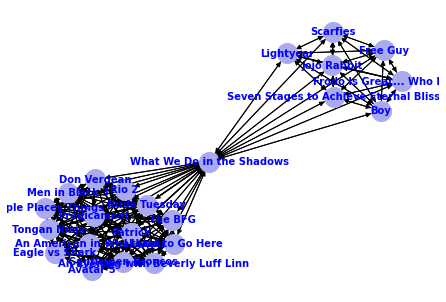

In [ ]:
opts = {'node_size': 400, 
        'font_color': 'b',
        'font_size': 10,
        'font_weight': 'bold'}

nx.draw(g, with_labels=True, labels=nodes_index,
       node_color='#AAAAEE', **opts)
plt.show()

In [ ]:
dataset = sc.parallelize(l1).cache()

In [ ]:
total_movies = max(dataset.max(lambda x:x[0])[0],dataset.max(lambda x:x[1])[1])
print(total_movies) #counting nodes by index: the indeces start from 0 so we have 23 movies

22


In [ ]:
outdegree = dataset.countByKey() #computing outdegree
outdegree[0], outdegree[2], outdegree[18], outdegree[22]

(15, 15, 7, 22)

In [ ]:

P = dataset.map(lambda x:(x[0],x[1],1/outdegree[x[0]]))
P.take(20) #connection matrix

[(0, 1, 0.06666666666666667),
 (0, 2, 0.06666666666666667),
 (0, 4, 0.06666666666666667),
 (0, 5, 0.06666666666666667),
 (0, 8, 0.06666666666666667),
 (0, 9, 0.06666666666666667),
 (0, 12, 0.06666666666666667),
 (0, 13, 0.06666666666666667),
 (0, 14, 0.06666666666666667),
 (0, 15, 0.06666666666666667),
 (0, 16, 0.06666666666666667),
 (0, 17, 0.06666666666666667),
 (0, 20, 0.06666666666666667),
 (0, 21, 0.06666666666666667),
 (0, 22, 0.06666666666666667),
 (1, 0, 0.06666666666666667),
 (1, 2, 0.06666666666666667),
 (1, 4, 0.06666666666666667),
 (1, 5, 0.06666666666666667),
 (1, 8, 0.06666666666666667)]

In [ ]:
import numpy as np
p = np.full((total_movies+1,), 1/(total_movies+1))
p[:10] #setting probability vector

array([0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826])

In [ ]:
# inverting the order of nodes in the matrix
PT = P.map(lambda x: (x[1],x[0],x[2]))

The number of iterations is kept small because we are dealing with a very small network; we will see in the PageRank with Euclidean distance that the algorithm automatically stops at 17 iterations.

In [ ]:
#computing pagerank
for i in range(50):
    new_p = PT.map(lambda x:(x[0],(x[2]*p[x[1]])))\
              .reduceByKey(lambda x,y: x+y)\
              .collect()
    for idx,prb in new_p:
        p[idx] = prb
    
    print(f"iteration {i}")


iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49


In [ ]:
list(zip(p.argsort()[::-1], p[p.argsort()[::-1]])) #showing results by value. they resemble the ones computed on the same graph through Networkx

[(22, 0.07434390743481965),
 (12, 0.05065810289007957),
 (1, 0.05065810289007957),
 (2, 0.05065810289007957),
 (4, 0.05065810289007957),
 (5, 0.05065810289007957),
 (8, 0.05065810289007957),
 (9, 0.05065810289007957),
 (21, 0.05065810289007957),
 (0, 0.05065810289007957),
 (13, 0.05065810289007957),
 (14, 0.05065810289007957),
 (15, 0.05065810289007957),
 (16, 0.05065810289007957),
 (17, 0.05065810289007957),
 (20, 0.05065810289007957),
 (10, 0.023683507030569467),
 (7, 0.023683507030569467),
 (6, 0.023683507030569467),
 (18, 0.023683507030569467),
 (3, 0.023683507030569467),
 (19, 0.023683507030569467),
 (11, 0.023683507030569467)]

Checking the index with the source dataset containing movies and their corresponding index (as done in the next example) we would see that this result is coherent with reality; node 22 corresponds to "What We Do in The Shadows" the only movie that has higher probability to be reached, since it's connected to movies where both Taika Waititi and Jemaine Clement acted in. It is in fact the only movie where the two worked together as actors. The following image shows the graph colored by pagerank value.

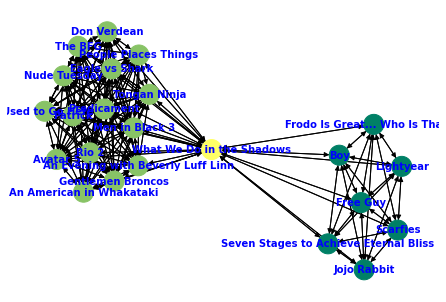

In [ ]:
nx.draw(g, with_labels=True, labels=nodes_index,
        node_color=p, cmap=plt.cm.summer, **opts)
plt.show()

# PageRank (Iterations only) on 2020-2021 movies Network

The following code has been run on a larger dataset with 8641 movies, with actors that have only acted in one movie released in the 2020-2021 years removed.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ventiventuno.json to ventiventuno.json


In [ ]:
df = pd.read_json(io.StringIO(uploaded.get('ventiventuno.json').decode('utf-8')))

In [ ]:
l1 = list(zip(df[0], df[1]))

In [ ]:
dataset = sc.parallelize(l1).cache()

In [ ]:
total_movies = max(dataset.max(lambda x:x[0])[0],dataset.max(lambda x:x[1])[1])
print(total_movies)

8460


In [ ]:
outdegree = dataset.countByKey()

In [ ]:
P = dataset.map(lambda x:(x[0],x[1],1/outdegree[x[0]]))
P.take(20)

[(0, 8092, 0.3333333333333333),
 (0, 4899, 0.3333333333333333),
 (0, 6579, 0.3333333333333333),
 (1, 3279, 0.16666666666666666),
 (1, 3279, 0.16666666666666666),
 (1, 3279, 0.16666666666666666),
 (1, 3279, 0.16666666666666666),
 (1, 3279, 0.16666666666666666),
 (1, 3279, 0.16666666666666666),
 (2, 3784, 0.2),
 (2, 3697, 0.2),
 (2, 642, 0.2),
 (2, 3678, 0.2),
 (2, 6253, 0.2),
 (3, 4236, 0.5),
 (3, 4236, 0.5),
 (4, 470, 0.05263157894736842),
 (4, 684, 0.05263157894736842),
 (4, 1384, 0.05263157894736842),
 (4, 3080, 0.05263157894736842)]

In [ ]:
p = np.full((total_movies+1,), 1/(total_movies+1))
p[:10]

array([0.00011819, 0.00011819, 0.00011819, 0.00011819, 0.00011819,
       0.00011819, 0.00011819, 0.00011819, 0.00011819, 0.00011819])

In [ ]:
PT = P.map(lambda x: (x[1],x[0],x[2]))   

In [ ]:
for i in range(1000): #takes approximately 5/7 minutes 
    new_p = PT.map(lambda x:(x[0],(x[2]*p[x[1]])))\
              .reduceByKey(lambda x,y: x+y)\
              .collect()
    for idx,prb in new_p:
        p[idx] = prb

In [ ]:
list(zip(p.argsort()[::-1], p[p.argsort()[::-1]])) #sorted results, output removed for space reason. top value (4442, 0.002052534354076937)

Because the dataset has been sorted by name, we can retrieve the movie titles of the highest result by either accessing a list of title by index of by creating a dictionary of titles. Both methods bring the same result.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titles2021.json to titles2021.json


In [ ]:
titles = pd.read_json(io.StringIO(uploaded.get('titles2021.json').decode('utf-8')))

In [ ]:
titles[0][4442]

'Mission: The Prophet'

Dictionary alternative:

In [ ]:
titles2 = list(titles[0].values.tolist())

In [ ]:
titles2 # output removed for space reason

In [ ]:
movies = range(len(titles2))
movie_titles = {p: l for p, l in zip(movies, titles2)}
movie_titles #output removed for space reason.

In [ ]:
movie_titles[4442]

'Mission: The Prophet'

#PageRank Euclidean Distance Small network

After defining the Euclidean distance function, we see that the process as seen is class, adapted for this dataset, works on the small dataset leading to similar results.

In [ ]:
def l2distance(v, q):
    
    if len(v) != len(q):
        raise ValueError('Vectors of different lenght'
                         ' error')
    
    return sum([(q_el - v_el)**2 for v_el, q_el in zip(v, q)])

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving taikajemcountminusone.json to taikajemcountminusone (2).json


In [ ]:
df = pd.read_json(io.StringIO(uploaded.get('taikajemcountminusone.json').decode('utf-8')))

In [ ]:
l1 = list(zip(df[0], df[1]))

In [ ]:
dataset = sc.parallelize(l1).cache()

In [ ]:
total_movies = max(dataset.max(lambda x:x[0])[0],dataset.max(lambda x:x[1])[1])
print(total_movies)

22


In [ ]:
outdegree = dataset.countByKey()

In [ ]:
P = dataset.map(lambda x:(x[0],x[1],1/outdegree[x[0]]))
P.take(20)

[(0, 1, 0.06666666666666667),
 (0, 2, 0.06666666666666667),
 (0, 4, 0.06666666666666667),
 (0, 5, 0.06666666666666667),
 (0, 8, 0.06666666666666667),
 (0, 9, 0.06666666666666667),
 (0, 12, 0.06666666666666667),
 (0, 13, 0.06666666666666667),
 (0, 14, 0.06666666666666667),
 (0, 15, 0.06666666666666667),
 (0, 16, 0.06666666666666667),
 (0, 17, 0.06666666666666667),
 (0, 20, 0.06666666666666667),
 (0, 21, 0.06666666666666667),
 (0, 22, 0.06666666666666667),
 (1, 0, 0.06666666666666667),
 (1, 2, 0.06666666666666667),
 (1, 4, 0.06666666666666667),
 (1, 5, 0.06666666666666667),
 (1, 8, 0.06666666666666667)]

In [ ]:
PT = P.map(lambda x: (x[1],x[0],x[2]))

In [ ]:
page_rank = np.ones(total_movies+1)/(total_movies+1)
old_page_rank = np.ones(total_movies+1)

In [ ]:
page_rank

array([0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826])

In [ ]:
tolerance = 10e-7
max_iterations = 1000

iteration = 0
while l2distance(old_page_rank, page_rank) >= tolerance and \
      iteration < max_iterations:
    old_page_rank = page_rank
    
    page_rank_values = (PT
                        .map(lambda t: (t[0], t[2]*page_rank[t[1]]))
                        .reduceByKey(lambda a, b: a+b)
                        .sortByKey()
                        .collect()
                       )
    
    page_rank = np.array([c for (i, c) in page_rank_values])
    
    print(page_rank)

    iteration += 1

[0.04255599 0.04255599 0.04255599 0.03924337 0.04255599 0.04255599
 0.03924337 0.03924337 0.04255599 0.04255599 0.03924337 0.03924337
 0.04255599 0.04255599 0.04255599 0.04255599 0.04255599 0.04255599
 0.03924337 0.03924337 0.04255599 0.04255599 0.08695652]
[0.0436715  0.0436715  0.0436715  0.03758974 0.0436715  0.0436715
 0.03758974 0.03758974 0.0436715  0.0436715  0.03758974 0.03758974
 0.0436715  0.0436715  0.0436715  0.0436715  0.0436715  0.0436715
 0.03758974 0.03758974 0.0436715  0.0436715  0.08179936]
[0.04447822 0.04447822 0.04447822 0.03593793 0.04447822 0.04447822
 0.03593793 0.03593793 0.04447822 0.04447822 0.03593793 0.03593793
 0.04447822 0.04447822 0.04447822 0.04447822 0.04447822 0.04447822
 0.03593793 0.03593793 0.04447822 0.04447822 0.08126124]
[0.0452067  0.0452067  0.0452067  0.03449763 0.0452067  0.0452067
 0.03449763 0.03449763 0.0452067  0.0452067  0.03449763 0.03449763
 0.0452067  0.0452067  0.0452067  0.0452067  0.0452067  0.0452067
 0.03449763 0.03449763 0.0452

The result is indeed similar to the previous algorithm. Node 22 is still the node with highest value, and the the ranking of the following values is also the same.

In [ ]:
list(zip(page_rank.argsort()[::-1], page_rank[page_rank.argsort()[::-1]]))

[(22, 0.07552767673270142),
 (12, 0.049595854680234745),
 (1, 0.049595854680234745),
 (2, 0.049595854680234745),
 (4, 0.049595854680234745),
 (5, 0.049595854680234745),
 (8, 0.049595854680234745),
 (9, 0.049595854680234745),
 (21, 0.049595854680234745),
 (0, 0.049595854680234745),
 (13, 0.049595854680234745),
 (14, 0.049595854680234745),
 (15, 0.049595854680234745),
 (16, 0.049595854680234745),
 (17, 0.049595854680234745),
 (20, 0.049595854680234745),
 (10, 0.025790643294825326),
 (7, 0.025790643294825326),
 (6, 0.025790643294825326),
 (3, 0.025790643294825326),
 (11, 0.025790643294825326),
 (18, 0.025790643294825322),
 (19, 0.025790643294825322)]

In [ ]:
iteration #number of needed iterations

17

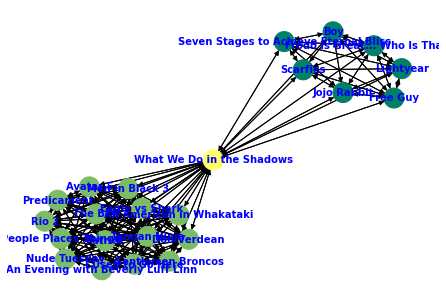

In [ ]:
nx.draw(g, with_labels=True, labels=nodes_index,
        node_color=page_rank, cmap=plt.cm.summer, **opts)
plt.show()

# PageRank with Euclidean distance and Taxation on a Small network

By nature of the network, it's impossible to have dangling nodes or spider traps; even though the network is directed, each edge exista in both directiona by definition, because we have connected movies if they share an actor, so the relationship is symmetrical. We can only have isolated components, and even though it is highly unlikely that a small group of movies does not share even a single acting credit with the main component of the network, we cannot exclude it completely, so we can run the algorithm with the taxation variation too. 

In [ ]:
#we re-inizialize the sparkcontext and data using the code in the previous section until the last step
tolerance = 10e-7
max_iterations = 1000

iteration = 0
while l2distance(old_page_rank, page_rank) >= tolerance and \
      iteration < max_iterations:
    beta = 0.8
    old_page_rank = page_rank
    
    page_rank_values = (PT
                        .map(lambda t: (t[0], t[2]*page_rank[t[1]]))
                        .reduceByKey(lambda a, b: a+b)
                        .sortByKey()
                        .collect()
                       )
    page_rank = np.array([beta*c + (1-beta)/(total_movies+1)
                              for (i, c) in page_rank_values])
    print(page_rank)

    iteration += 1

    

[0.04274045 0.04274045 0.04274045 0.04009034 0.04274045 0.04274045
 0.04009034 0.04009034 0.04274045 0.04274045 0.04009034 0.04009034
 0.04274045 0.04274045 0.04274045 0.04274045 0.04274045 0.04274045
 0.04009034 0.04009034 0.04274045 0.04274045 0.07826087]
[0.04345437 0.04345437 0.04345437 0.03903202 0.04345437 0.04345437
 0.03903202 0.03903202 0.04345437 0.04345437 0.03903202 0.03903202
 0.04345437 0.04345437 0.04345437 0.04345437 0.04345437 0.04345437
 0.03903202 0.03903202 0.04345437 0.04345437 0.07496029]
[0.04386741 0.04386741 0.04386741 0.0381863  0.04386741 0.04386741
 0.0381863  0.0381863  0.04386741 0.04386741 0.0381863  0.0381863
 0.04386741 0.04386741 0.04386741 0.04386741 0.04386741 0.04386741
 0.0381863  0.0381863  0.04386741 0.04386741 0.07468477]
[0.04416579 0.04416579 0.04416579 0.03759635 0.04416579 0.04416579
 0.03759635 0.03759635 0.04416579 0.04416579 0.03759635 0.03759635
 0.04416579 0.04416579 0.04416579 0.04416579 0.04416579 0.04416579
 0.03759635 0.03759635 0.0

In [ ]:
list(zip(page_rank.argsort()[::-1], page_rank[page_rank.argsort()[::-1]]))

[(22, 0.07552767673270142),
 (12, 0.049595854680234745),
 (1, 0.049595854680234745),
 (2, 0.049595854680234745),
 (4, 0.049595854680234745),
 (5, 0.049595854680234745),
 (8, 0.049595854680234745),
 (9, 0.049595854680234745),
 (21, 0.049595854680234745),
 (0, 0.049595854680234745),
 (13, 0.049595854680234745),
 (14, 0.049595854680234745),
 (15, 0.049595854680234745),
 (16, 0.049595854680234745),
 (17, 0.049595854680234745),
 (20, 0.049595854680234745),
 (10, 0.025790643294825326),
 (7, 0.025790643294825326),
 (6, 0.025790643294825326),
 (3, 0.025790643294825326),
 (11, 0.025790643294825326),
 (18, 0.025790643294825322),
 (19, 0.025790643294825322)]

In [ ]:
iteration #number of needed iterations

6

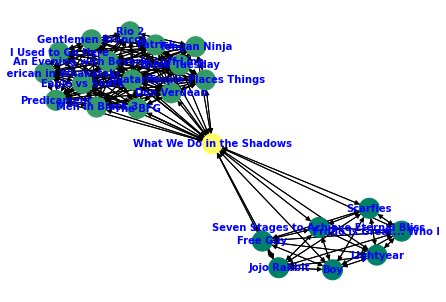

In [ ]:
nx.draw(g, with_labels=True, labels=nodes_index,
        node_color=page_rank, cmap=plt.cm.summer, **opts)
plt.show()

The result has the same ordering and very similar values, but needed less iterations to reach convergence.

#PageRank Euclidean distance Complete network

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ventiventuno.json to ventiventuno.json


In [ ]:
df = pd.read_json(io.StringIO(uploaded.get('ventiventuno.json').decode('utf-8')))

In [ ]:
l1 = list(zip(df[0], df[1]))

In [ ]:
dataset = sc.parallelize(l1).cache()

In [ ]:
total_movies = max(dataset.max(lambda x:x[0])[0],dataset.max(lambda x:x[1])[1])
print(total_movies)

8460


In [ ]:
outdegree = dataset.countByKey()

In [ ]:
P = dataset.map(lambda x:(x[1],x[0],1/outdegree[x[0]]))
P.take(20) #even directly creating the matrix and avoiding the inverting step, the Euclidean distance computation throws an error 

[(8092, 0, 0.3333333333333333),
 (4899, 0, 0.3333333333333333),
 (6579, 0, 0.3333333333333333),
 (3279, 1, 0.16666666666666666),
 (3279, 1, 0.16666666666666666),
 (3279, 1, 0.16666666666666666),
 (3279, 1, 0.16666666666666666),
 (3279, 1, 0.16666666666666666),
 (3279, 1, 0.16666666666666666),
 (3784, 2, 0.2),
 (3697, 2, 0.2),
 (642, 2, 0.2),
 (3678, 2, 0.2),
 (6253, 2, 0.2),
 (4236, 3, 0.5),
 (4236, 3, 0.5),
 (470, 4, 0.05263157894736842),
 (684, 4, 0.05263157894736842),
 (1384, 4, 0.05263157894736842),
 (3080, 4, 0.05263157894736842)]

In [ ]:
page_rank = np.ones((total_movies)+1)/((total_movies)+1)
old_page_rank = np.ones((total_movies)+1)

In [ ]:
page_rank

array([0.00011819, 0.00011819, 0.00011819, ..., 0.00011819, 0.00011819,
       0.00011819])

In [ ]:
tolerance = 10e-7
max_iterations = 1000

iteration = 0
while l2distance(old_page_rank, page_rank) >= tolerance and \
      iteration < max_iterations:
    old_page_rank = page_rank
    
    page_rank_values = (PT
                        .map(lambda t: (t[0], t[2]*page_rank[t[1]]))
                        .reduceByKey(lambda a, b: a+b)
                        .sortByKey()
                        .collect()
                       )
    
    page_rank = np.array([c for (i, c) in page_rank_values])
    
    print(page_rank)

    iteration += 1

[1.68330271e-04 1.18189339e-04 1.90416158e-04 ... 1.43137027e-04
 1.18189339e-04 3.93964464e-05]


ValueError: ignored